# Intro



Random Forest : Group of trees.

It is a bagging technique which means Boostraped Aggregation and that involves sampling of data.
So from that random selection of data , Random of Random Forest came.

If in Bagging technique if take all the base models are Decision Trees then become Random forest , though there are more differences also.


**Bootstraping**

We creates samples out of our data.

1. Row Sampling

2. Col Sampling 

3. Combination of Row and col Sampling

All the row or columns is then random selected.

Selection also is of two types.

1. With Replacement

2. Without Replacement

Let say you are doing with replacement , then we pick row 1 , then put it back so for next time , 1 again available.
So sample data we get may have duplicate rows.


**Aggregation**

1. Most frequent or most common is accepted in case of classification.

2. We calculate mean of all in case of regression.


In [10]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_classification

In [11]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [12]:
df = pd.DataFrame(X, columns=['coll', 'col2', 'co13', 'col4', 'col5'])
df[ 'target'] = y
print(df. shape)
df.head()

(100, 6)


,coll,col2,co13,col4,col5,target
0,-0.621013,2.338879,-2.464502,-0.933263,-0.049378,1
1,0.180312,1.826316,-1.347766,1.611664,1.715115,0
2,0.817870,2.801104,-1.740460,-3.976084,-0.386252,1
3,-0.468834,3.684883,-3.933614,-4.713520,-0.624844,1
4,0.585287,-0.269434,-2.801686,2.852859,-0.599183,0


In [13]:
import random

def sample_rows(df,percent) :
    return df.sample(int (percent*df.shape[0]), replace=True)

def sample_features (df,percent) :
    cols = random.sample(df.columns.tolist()[:-1], int(percent*df.shape[1]))
    return df[cols]

In [14]:
def combined_sampling(df, row_percent, col_percent) :
    new_df = sample_rows (df, row_percent)
    return sample_features (new_df,col_percent)

In [15]:
df1 = sample_rows(df,0.8) 
df2 = sample_rows(df,0.8) 
df3 = sample_rows(df,0.8) 

print(df1.shape)

(80, 6)


In [16]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier ()
clf3 = DecisionTreeClassifier()

In [17]:
clf1.fit(df1.iloc[:,0:5],df1. iloc[:, -1])
clf2.fit(df2.iloc[:,0:5], df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.32, 0.9375, 'x[0] <= -0.089\ngini = 0.5\nsamples = 80\nvalue = [40, 40]'),
 Text(0.16, 0.8125, 'x[1] <= 2.42\ngini = 0.064\nsamples = 30\nvalue = [1, 29]'),
 Text(0.24, 0.875, 'True  '),
 Text(0.08, 0.6875, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.24, 0.6875, 'x[3] <= -0.316\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.32, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.48, 0.8125, 'x[3] <= -2.279\ngini = 0.343\nsamples = 50\nvalue = [39, 11]'),
 Text(0.4, 0.875, '  False'),
 Text(0.4, 0.6875, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.56, 0.6875, 'x[2] <= -3.288\ngini = 0.169\nsamples = 43\nvalue = [39, 4]'),
 Text(0.48, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.64, 0.5625, 'x[0] <= 1.768\ngini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(0.44, 0.4375, 'x[2] <= 1.211\ngini = 0.095\nsamples = 40\nvalue = [38, 2]'),
 Text(0.28, 0.3125, 'x[2] <= -0.228\n

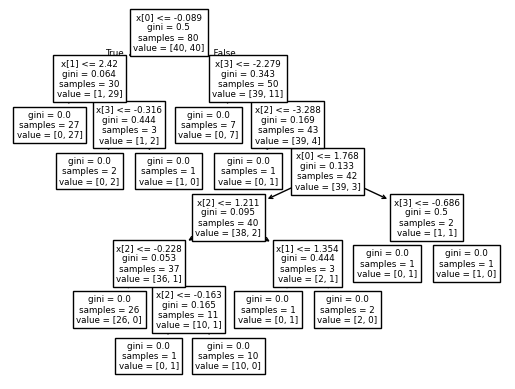

In [18]:
from sklearn. tree import plot_tree

plot_tree(clf1)

[Text(0.45454545454545453, 0.9166666666666666, 'x[0] <= 0.148\ngini = 0.497\nsamples = 80\nvalue = [37, 43]'),
 Text(0.2727272727272727, 0.75, 'x[4] <= 0.71\ngini = 0.184\nsamples = 39\nvalue = [4, 35]'),
 Text(0.36363636363636365, 0.8333333333333333, 'True  '),
 Text(0.18181818181818182, 0.5833333333333334, 'x[3] <= 0.585\ngini = 0.054\nsamples = 36\nvalue = [1, 35]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.2727272727272727, 0.4166666666666667, 'x[1] <= 1.116\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.18181818181818182, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6363636363636364, 0.75, 'x[3] <= -2.484\ngini = 0.314\nsamples = 41\nvalue = [33, 8]'),
 Text(0.5454545454545454, 0.8333333333333333, '  False'),
 Text(0.5454545454545454, 0.

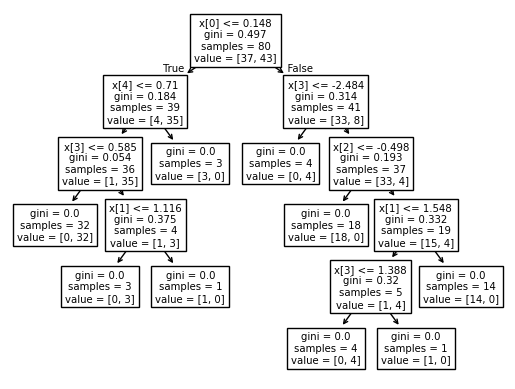

In [19]:
plot_tree(clf2)

[Text(0.36363636363636365, 0.9166666666666666, 'x[0] <= 0.135\ngini = 0.489\nsamples = 80\nvalue = [34, 46]'),
 Text(0.18181818181818182, 0.75, 'x[4] <= 1.468\ngini = 0.049\nsamples = 40\nvalue = [1, 39]'),
 Text(0.2727272727272727, 0.8333333333333333, 'True  '),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.0\nsamples = 39\nvalue = [0, 39]'),
 Text(0.2727272727272727, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5454545454545454, 0.75, 'x[3] <= -2.369\ngini = 0.289\nsamples = 40\nvalue = [33, 7]'),
 Text(0.45454545454545453, 0.8333333333333333, '  False'),
 Text(0.45454545454545453, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6363636363636364, 0.5833333333333334, 'x[2] <= 1.13\ngini = 0.153\nsamples = 36\nvalue = [33, 3]'),
 Text(0.45454545454545453, 0.4166666666666667, 'x[1] <= 1.815\ngini = 0.059\nsamples = 33\nvalue = [32, 1]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.54

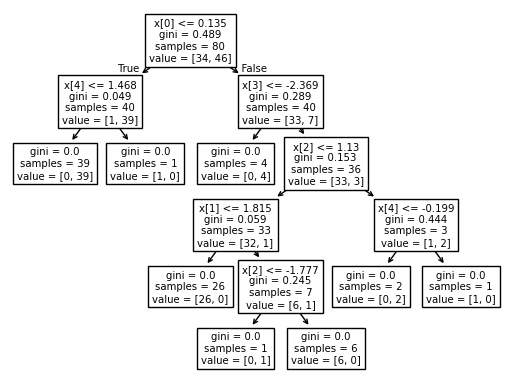

In [20]:
plot_tree(clf3)

In [21]:
clf1.predict( np.array( [0.612320,-2.159984,1.978356,1.658109,-1.556476] ).reshape(1,5) )

/Users/akashjain/Desktop/Machine Learning/ML/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [22]:
clf2.predict( np.array( [0.612320,-2.159984,1.978356,1.658109,-1.556476] ).reshape(1,5) )

/Users/akashjain/Desktop/Machine Learning/ML/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [23]:
clf3.predict( np.array( [0.612320,-2.159984,1.978356,1.658109,-1.556476] ).reshape(1,5) )

/Users/akashjain/Desktop/Machine Learning/ML/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

slly we can do column sampling and row sampling too.

# Bias Variance and Random Forest

Bias : Low Bias means good performance on training.

Variance : High variance means not good performance of test.

We want Low Bias and Low Variance.

But between **bias and variance there is inverse relation**

Example:

1. LBHV shown by Fully Grown decision trees , SVM , KNN

2. HBLV shown by Linear Regression and Logistic Regression.

If Random forest provided with LBHV algo then it convert into LBLV .

Let say your data is containg 10k and around 100 is outliers.

In case of random forest , data is distributed among several base decision trees.

So effect of outliers or noisy points is distributed.

Hence the variety is reduced and Model we get has Low Variance.


**Example on Classification**

In [24]:
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_circles 
import matplotlib.pyplot as plt

In [25]:
X, y = make_circles(n_samples=500,factor=0.1,noise=0.35, random_state=42)
# factor : relative size of outer to inner

In [26]:
print(X.shape , y.shape)

(500, 2) (500,)


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

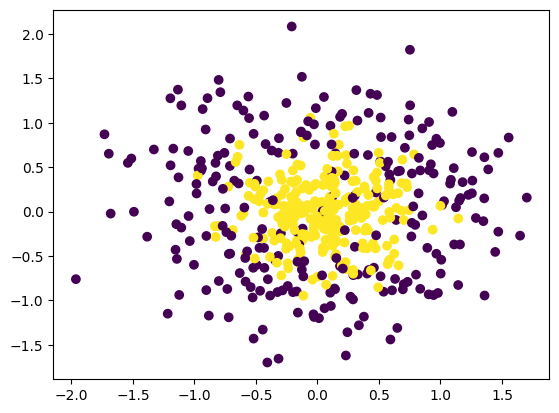

In [28]:
plt.scatter(X[:,0],X[:,1],c=y)

[Text(0.6667583626760564, 0.9705882352941176, 'x[0] <= 0.745\ngini = 0.5\nsamples = 400\nvalue = [196, 204]'),
 Text(0.3616857394366197, 0.9117647058823529, 'x[0] <= -0.359\ngini = 0.49\nsamples = 350\nvalue = [150, 200]'),
 Text(0.514222051056338, 0.9411764705882353, 'True  '),
 Text(0.07746478873239436, 0.8529411764705882, 'x[0] <= -0.842\ngini = 0.372\nsamples = 97\nvalue = [73, 24]'),
 Text(0.028169014084507043, 0.7941176470588235, 'x[0] <= -0.978\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.014084507042253521, 0.7352941176470589, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.04225352112676056, 0.7352941176470589, 'x[0] <= -0.96\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.028169014084507043, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.056338028169014086, 0.6764705882352942, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.1267605633802817, 0.7941176470588235, 'x[1] <= -0.564\ngini = 0.457\nsamples = 65\nvalue = [42, 23

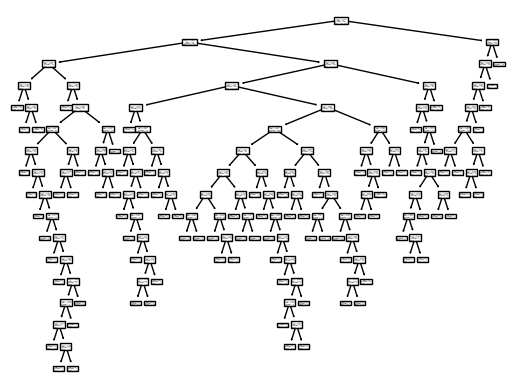

In [29]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

dtree = DecisionTreeClassifier()

dtree.fit(X_train,Y_train)

plot_tree(dtree)

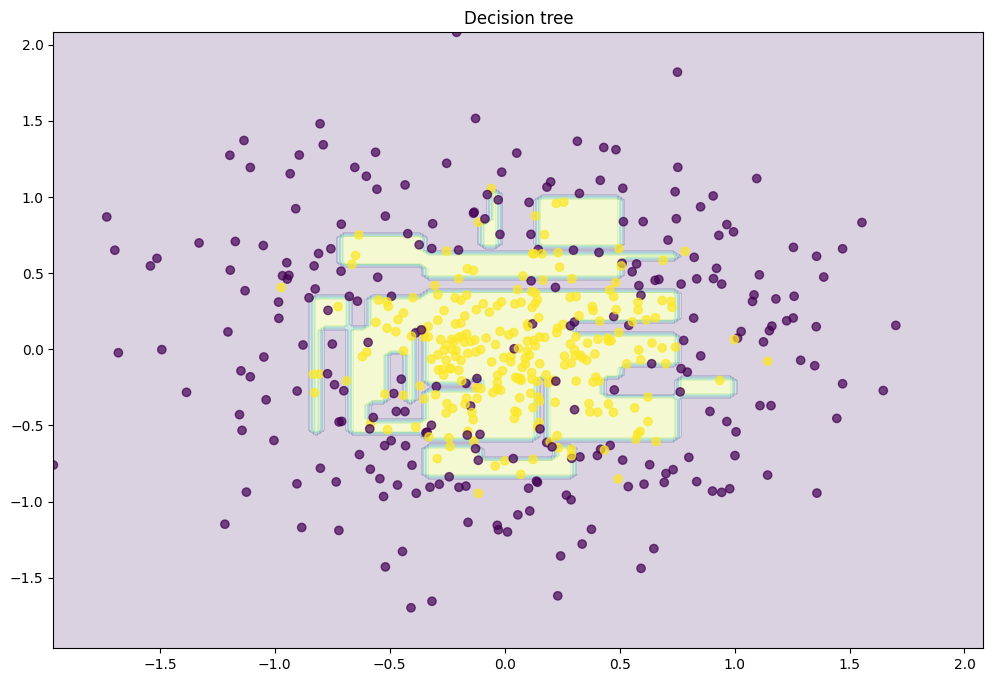

In [30]:

plt.figure(figsize= (12, 8))

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np. meshgrid(x_range, x_range)

y_hat = dtree.predict(np.c_[xx1.ravel(), xx2. ravel()])
y_hat = y_hat.reshape(xx1.shape)

plt.contourf (xx1, xx2, y_hat, alpha=0.2)
plt.scatter (X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title( "Decision tree")
plt.show()

This is a fully grown decision tree and It perfectly shows LBHV .

It is overfitting because some regions are just yellow because of one point.

If new similar data there will be much variance i.e HV.

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500 , random_state=42)
rf. fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

X = np.array([
    [1, 2],
    [2, 3],
    [3, 3],
    [6, 5],
    [7, 8],
    [8, 8]
])

y = np.array([0, 0, 0, 1, 1, 1])

xx1, xx2 = np.meshgrid(x_range, x_range)

xx1 = [[1.0, 4.5, 8.0],
       [1.0, 4.5, 8.0],
       [1.0, 4.5, 8.0]]

xx2 = [[1.0, 1.0, 1.0],
       [4.5, 4.5, 4.5],
       [8.0, 8.0, 8.0]]

grid_points = np.c_[xx1.ravel(), xx2.ravel()]

grid_points =
[[1.0, 1.0],
[4.5, 1.0],
[8.0, 1.0],
[1.0, 4.5],
[4.5, 4.5],
[8.0, 4.5],
[1.0, 8.0],
[4.5, 8.0],
[8.0, 8.0]]

y_hat = rf.predict(grid_points)

Let's say output is:
[0, 0, 1, 0, 1, 1, 0, 1, 1]

y_hat = y_hat.reshape(xx1.shape)
y_hat =
[[0, 0, 1],
 [0, 1, 1],
 [0, 1, 1]]



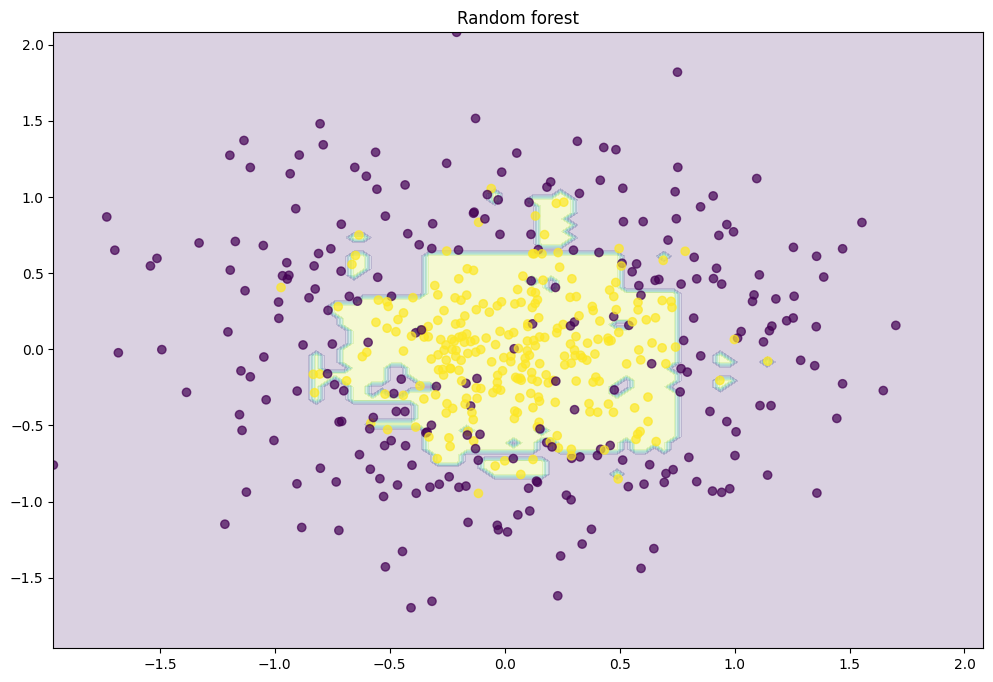

In [32]:
plt. figure(figsize=(12, 8))

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf. predict(np.c_[xx1.ravel(), xx2. ravel()])
y_hat = y_hat.reshape (xx1. shape)

plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

A case of LBLV.

Here you can observe no seperate region for single yellow point.



**Example on Regression**

In [33]:
import numpy as np

n_train = 150 
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp( -x**2 ) + 1.5 * np.exp( - (x-2)**2 )


def generate(n_samples , noise):

    X = np.random.rand(n_samples)*10 - 5

    X = np.sort(X).ravel()
    y = y = np.exp(- X ** 2) + 1.5 * np.exp(- (X - 2) ** 2)+ np. random. normal(0.0, noise, n_samples)

    X = X.reshape((n_samples , 1))

    return X , y


In [34]:
X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

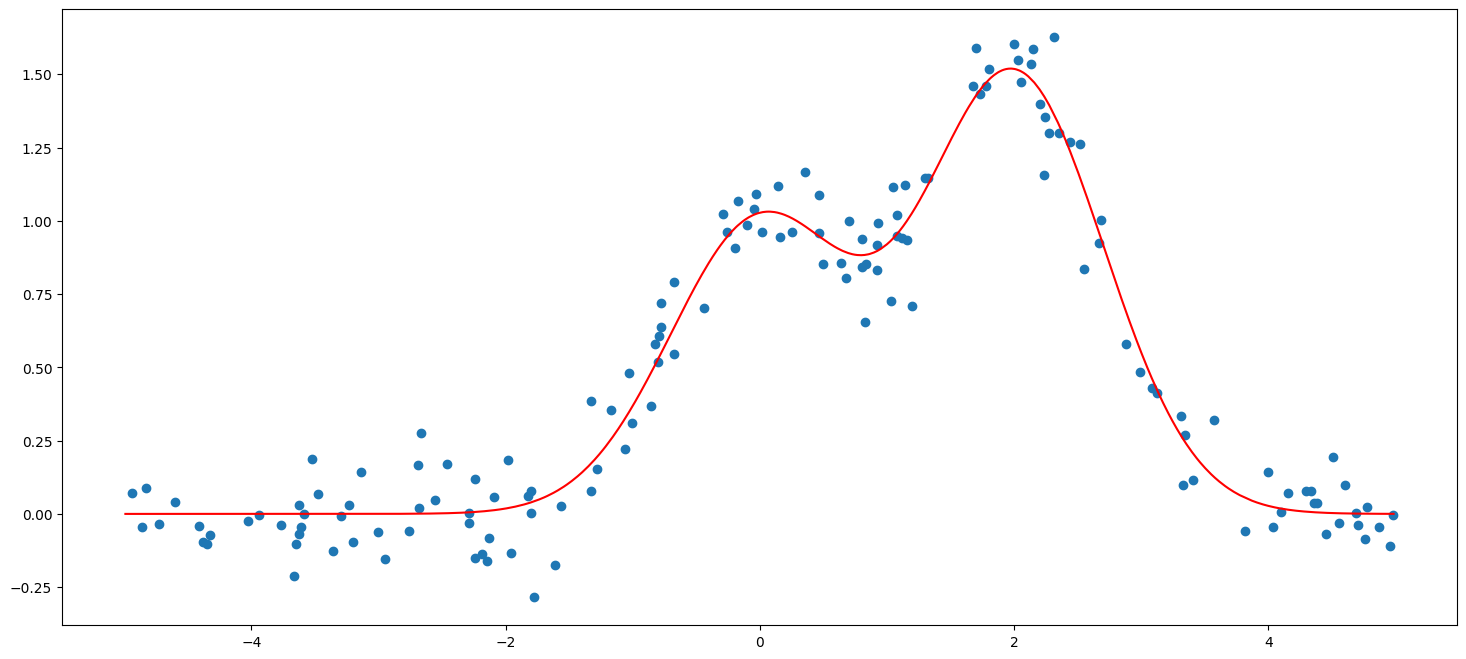

In [35]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train)

In [38]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
d_predict = dtree.predict(X_test)


Text(0.5, 1.0, 'Decision tree, MSE = 22.14')

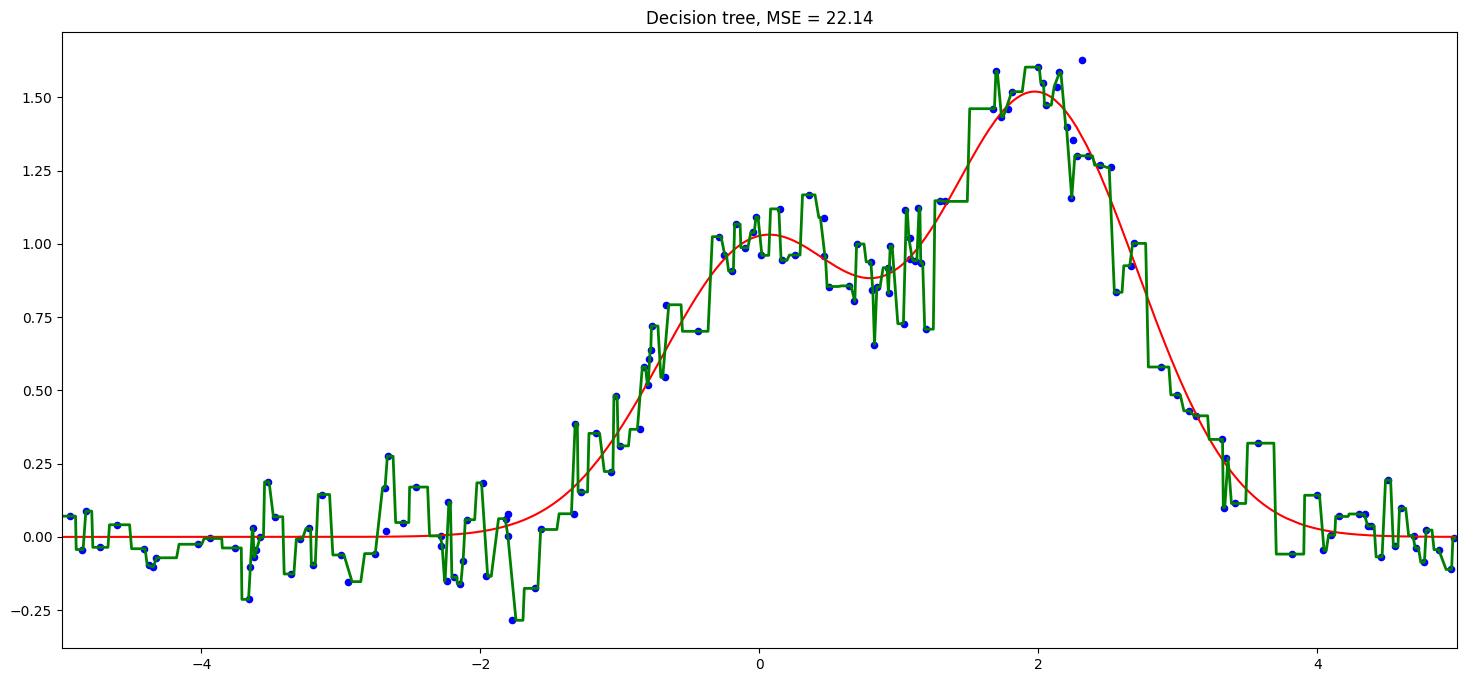

In [41]:

plt.figure(figsize=(18, 8))

plt.plot(X_test, f(X_test), "r")

plt.scatter (X_train, y_train, c="b", s=20)  #  s :  size of each point

plt.plot(X_test, d_predict, "g", lw=2)  # lw : line width 

plt.xlim([-5, 5])  # x-axis range from -5 to 5.

plt.title("Decision tree, MSE = %.2f" % np. sum((y_test - d_predict) ** 2))

In the above, training error is low , but testing error is high.

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

Text(0.5, 1.0, 'Decision tree, MSE = 15.39')

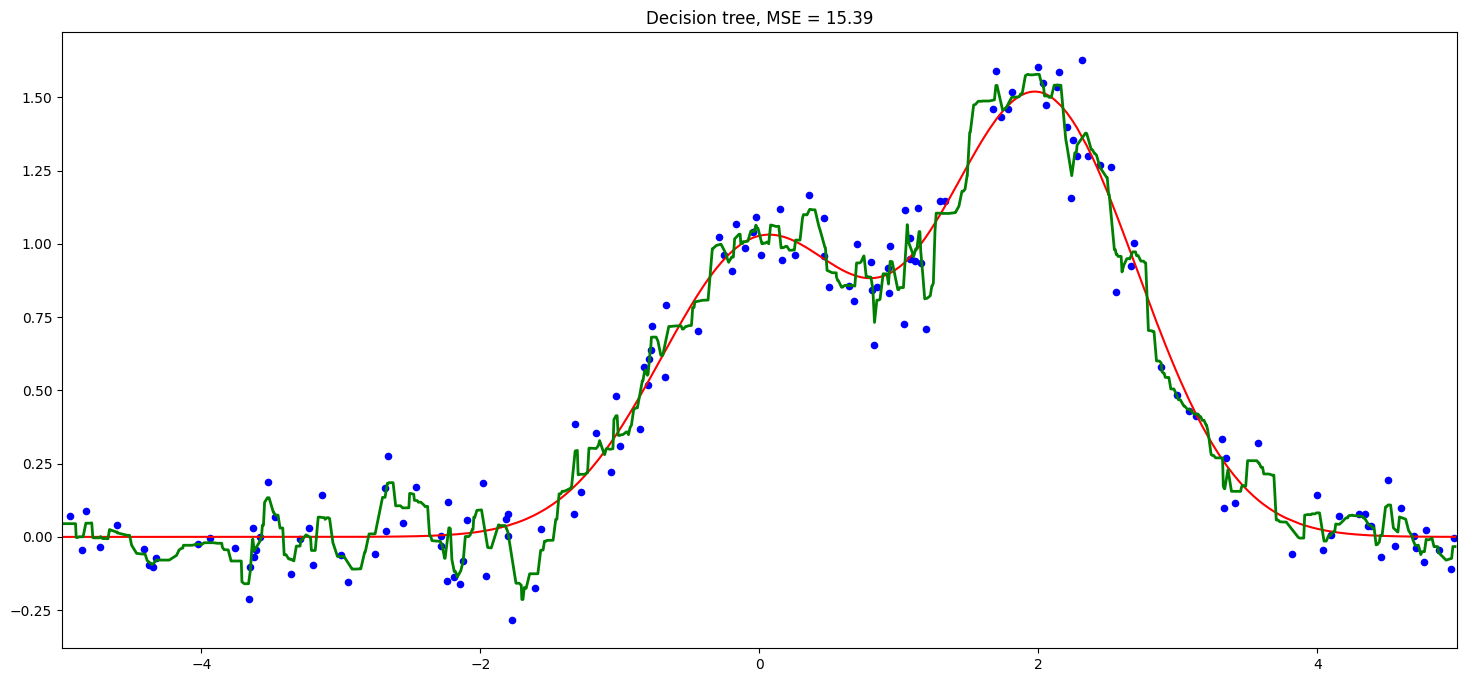

In [46]:

plt.figure(figsize=(18, 8))

plt.plot(X_test, f(X_test), "r")

plt.scatter (X_train, y_train, c="b", s=20)  #  s :  size of each point

plt.plot(X_test, rf_predict, "g", lw=2)  # lw : line width 

plt.xlim([-5, 5])  # x-axis range from -5 to 5.

plt.title("Decision tree, MSE = %.2f" % np. sum((y_test - rf_predict) ** 2))

In the above , there is a case of Low Bias and Low Variance and there is smoothening.

# Bagging VS Random Forest

Bagging is a general technique in which base algo i.e Base Estimator can be  KNN , SVM , Decision Tree.  

But in RandomForest the base algo is Decision Tree only.  

**Is Bagging Classifier with Decison Tree is equal to Random Forest ?**

No there is a difference in feature selection or column sampling.

Let say u choose to have two feature out of five features.

In Bagging , the column sampling is done at tree level.

In RandomForest , the column sampling is done at node level.

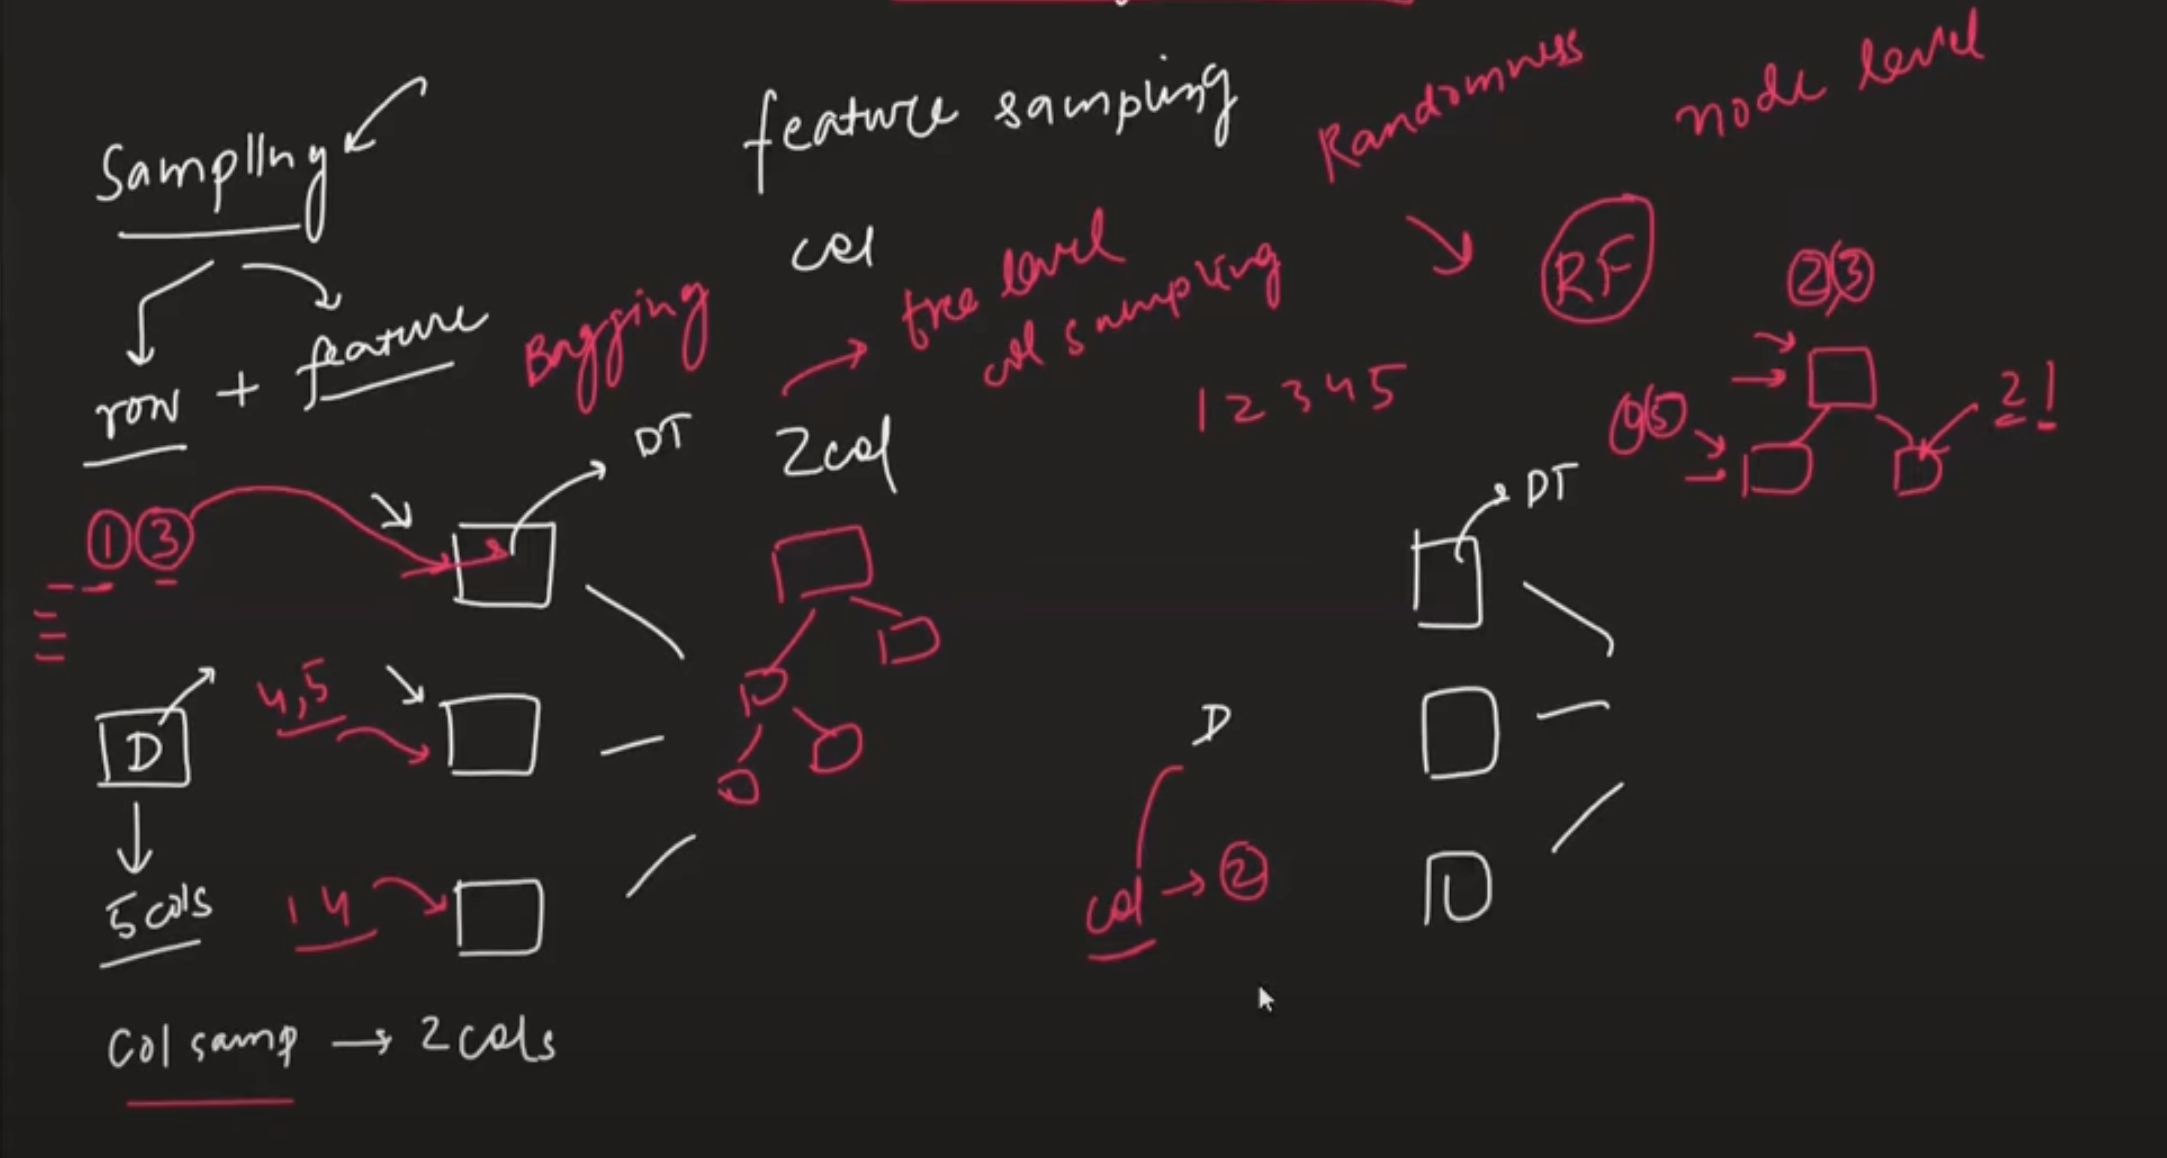

Due to this most of time RandomForest Performance is better than Bagging , due to more randomness.

**Example**

In [47]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt

In [50]:
X,y = make_classification(n_features=5,n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [51]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df[ 'target'] = y
print(df. shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.270455,0.697550,-2.776268,-0.883996,-1.324650,1
1,-0.778414,1.570880,0.240203,-2.718527,1.520001,1
2,1.295268,-1.733775,-2.314547,-0.459351,1.023226,0
3,2.545450,-0.394214,-2.341547,2.362996,-0.727943,0
4,-1.948241,-1.623255,0.038872,-1.281315,1.752575,1


In [52]:
bag = BaggingClassifier(max_features=2)

In [53]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

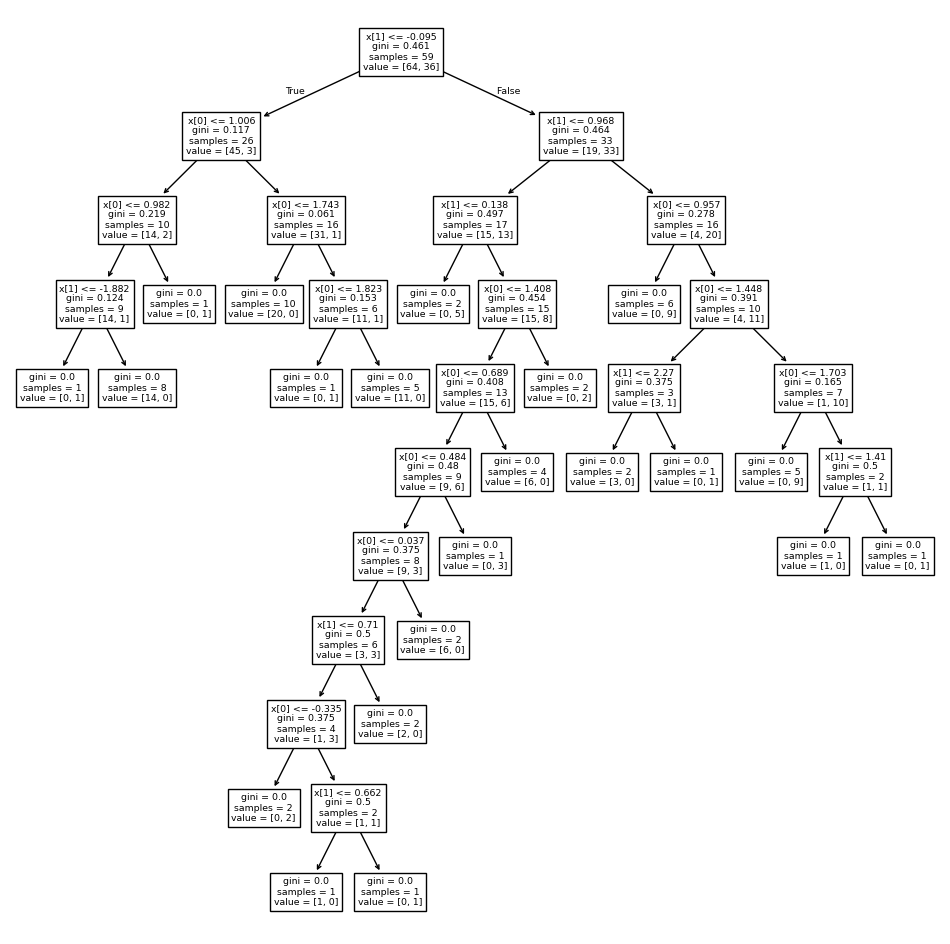

In [57]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [55]:
rf = RandomForestClassifier(max_features=2)

In [56]:
rf.fit(df.iloc[:,:5],df.iloc[:, -1])

RandomForestClassifier(max_features=2)

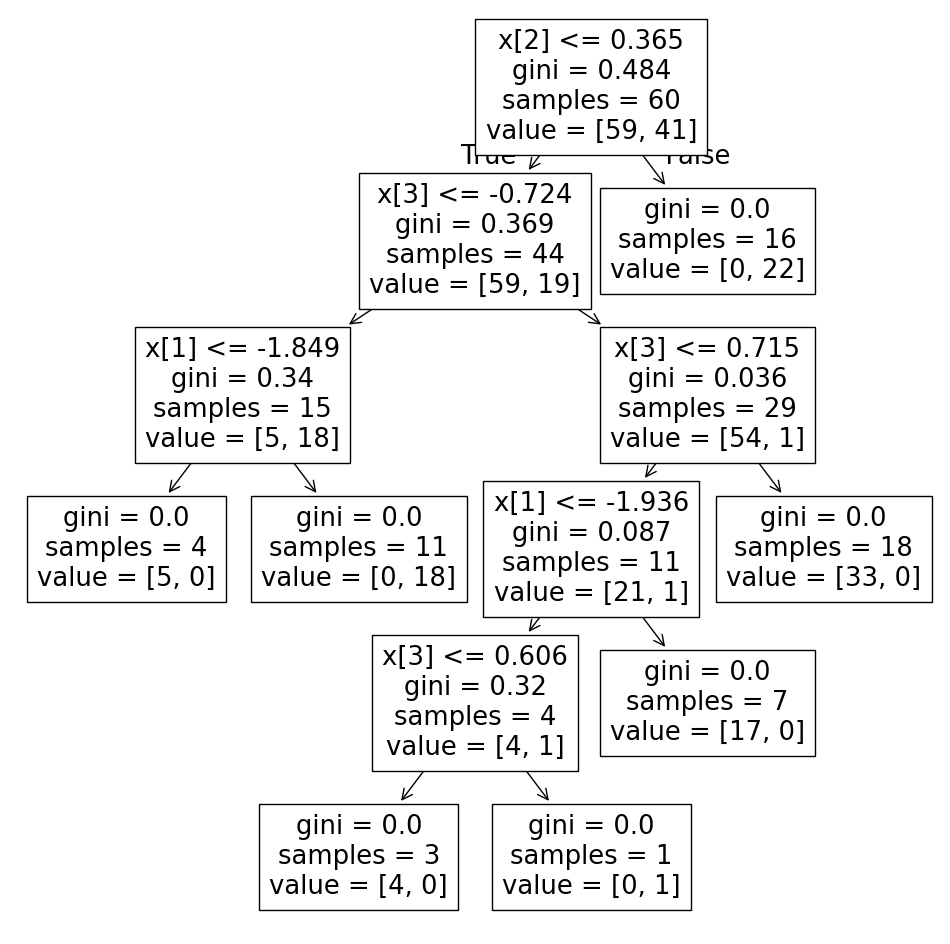

In [58]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

Here you can see there is feature sampling at node level. i.e more randomness

# Random Forest HyperParameterTuning


In [61]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:

df =pd.read_csv('/Users/akashjain/Desktop/Machine Learning/Utils/Datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [63]:
df['Gender'].replace({ 'Male' :0,'Female':1}, inplace=True)

/var/folders/68/g_j6jm596l5dg7k28vc763fh0000gn/T/ipykernel_1822/639461721.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({ 'Male' :0,'Female':1}, inplace=True)
/var/folders/68/g_j6jm596l5dg7k28vc763fh0000gn/T/ipykernel_1822/639461721.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [64]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [65]:
X = df. iloc [:,0:-1]
y = df.iloc[:, -1]

print(X)
print(y)

      User ID  Gender  Age  EstimatedSalary
0    15624510       0   19            19000
1    15810944       0   35            20000
2    15668575       1   26            43000
3    15603246       1   27            57000
4    15804002       0   19            76000
..        ...     ...  ...              ...
395  15691863       1   46            41000
396  15706071       0   51            23000
397  15654296       1   50            20000
398  15755018       0   36            33000
399  15594041       1   49            36000

[400 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [68]:
print(X_train.shape , X_test.shape)

(320, 4) (80, 4)


In [78]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.svm import SVC
from sklearn. linear_model import LogisticRegression


Gb = GradientBoostingClassifier()
SvC = SVC()
Lr = LogisticRegression()


Gb.fit (X_train, Y_train)
y_pred = Gb.predict(X_test)
accuracy_score(Y_test,y_pred)



0.9375

In [79]:

SvC.fit (X_train, Y_train)
y_pred = SvC.predict(X_test)
accuracy_score (Y_test,y_pred)



0.6125

In [80]:

Lr.fit (X_train, Y_train)
y_pred = Lr.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8875

In [81]:
rf = RandomForestClassifier()
rf. fit(X_train,Y_train)
y_pred = rf. predict (X_test)
accuracy_score (Y_test,y_pred)

0.8875

In [82]:
rf = RandomForestClassifier(max_samples=0.75, random_state=42)
rf. fit (X_train, Y_train)
y_pred = rf.predict(X_test)
accuracy_score (Y_test,y_pred)

0.925

In [88]:
# The cross_val_score function in scikit-learn is a tool for evaluating machine learning models
# using cross-validation. It splits the dataset into multiple subsets (folds), trains the model
# on a portion of the data, and validates it on the remaining data.

from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(LogisticRegression(),X,y, cv=10, scoring= 'accuracy'))


np.float64(0.8225)

In [90]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y, cv=10, scoring= 'accuracy'))



np.float64(0.8949999999999999)

**HyperParameter Tuning using GridSearchCV**

In [91]:
n_estimators = [20,60,100,120]
max_features = [0.2,0.6,1.0]
max_depth = [2,8, None]
max_samples = [0.5,0.75,1.0]

In [92]:
param_grid = {
'n_estimators' : n_estimators,
'max_features': max_features,
'max_depth' : max_depth,
'max_samples' :max_samples
}

print (param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [96]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 5,verbose=1,n_jobs = -1)

In [97]:
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=1)

In [98]:
rf_grid.best_params_

{'max_depth': 2, 'max_features': 0.6, 'max_samples': 0.5, 'n_estimators': 60}

In [99]:
rf_grid.best_score_

np.float64(0.9125)

**Using RandomSearchCV**

In [100]:
from sklearn. model_selection import RandomizedSearchCV 

rf_grid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 5,verbose=1,n_jobs =-1)

In [101]:
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=1)

In [102]:
rf_grid.best_params_

{'n_estimators': 100, 'max_samples': 0.5, 'max_features': 1.0, 'max_depth': 2}

In [103]:
rf_grid.best_score_

np.float64(0.909375)

On Big Dataset , Go for RandomizedSearchCV